In [2]:
import pandas as pd
import numpy as np
import re
from langdetect import detect
from sklearn.model_selection import train_test_split
import cld3
import math
from dataset import *
from main import *

In [449]:
train_subset = train.iloc[:1000]

In [450]:
train_subset.to_csv('data/train_subset.csv', index=False)

In [5]:
train = pd.read_csv("data/csv/train.csv")
train.head()

,Artist,Song,Genre,Language,Lyrics,reliable_lang
0,belle sebastian,legal man,Pop,en,"L-O-V-E love, it's coming back, it's coming ba...",en
1,pete townshend,a friend is a friend,Rock,en,When eyes meet in silence\nA pact can be made\...,en
2,blossoms,love talk,Rock,en,my eyes align with you\nyou're on my side\nand...,en
3,bukka white,parchman farm blues,Folk,en,Judge gimme me life this morn'in\nDown on Parc...,en
4,pat benatar,i won't,Rock,en,I was there when you cried like a baby\nWhen y...,en


In [9]:
train[train['Genre'].apply(lambda x: x in ['R&B'])]['Lyrics'].values

array(["I met a girl on Christmas day\nShe stole my heart took my breath away\nWe were young and quite naive\nYoung enough we still believed\n\nThat love never dies\nIt just grows throughout our lifetime\nAnd girl you know it's true\nHere's a Christmas song for you, baby\nHey girl\nMerry Christmas girl, yeah\n\nAt this special time of year\nI am thankful that you're still here\nThere'll be mistletoes and color lights for the Christmas tree\nThey barely define what you mean to me\n\nBaby love never dies\nIt just grows throughout our lifetime\nAnd girl you know it's true\nHere's a Christmas song for you, baby\nI love you girl, yeah\n\nIn my heart I always knew\nThat I would spend my whole life with you\nSo may your holidays be merry and be raised\nAnd may your world be at peace tonight\n\nBaby love never dies\nIt just grows throughout our lifetime\nAnd girl you know it's true\nYou're like a light in my life shining through\nIf there was only one thing I could do\nI'd sing this Christmas 

In [315]:
data = pd.read_csv("data/train.csv")
data = data[data['Language']=='en']
data = data[data['Lyrics'].apply(lambda x: '\n' in x)]
data = data.drop_duplicates(subset=['Artist', 'Song', 'Genre'], ignore_index=True)
data = data[data['Lyrics'].apply(lambda x: '---------' not in x)]
data['Lyrics'] = data['Lyrics'].apply(lambda x: re.sub('\[.*\]', ' ', x))

In [316]:
def check_en(line):
    result = cld3.get_language(line)
    lang = result[0]
    reliable = result[2]
    if reliable and lang == 'en':
        return 'en'
    else:
        return 'other'

In [328]:
len(data)

192123

In [317]:
data['reliable_lang'] = data['Lyrics'].apply(check_en)
data = data[data['reliable_lang']=='en']

In [321]:
indices = np.arange(len(data))
train_index, test_index = train_test_split(indices, test_size = 0.1)
train_index, dev_index = train_test_split(train_index, test_size=0.1)

train_data = data.iloc[train_index].reset_index(drop=True)
dev_data = data.iloc[dev_index].reset_index(drop=True)
test_data = data.iloc[test_index].reset_index(drop=True)

In [322]:
train_data.to_csv('data/csv/train.csv', index=False)
dev_data.to_csv('data/csv/dev.csv', index=False)
test_data.to_csv('data/csv/test.csv', index=False)

In [294]:
data['Genre'].value_counts()

Rock          96376
Pop           70438
Metal         15910
Jazz          11701
Folk           6922
Indie          5592
R&B            1572
Electronic      447
Name: Genre, dtype: int64

In [288]:
df = pd.read_csv('data/csv/test.csv')

In [290]:
df = df[df['Genre']=='Pop']

In [280]:
dev_data['Genre'].value_counts()

Rock          8679
Pop           6313
Metal         1490
Jazz          1035
Folk           603
Indie          497
R&B            171
Electronic      36
Name: Genre, dtype: int64

In [184]:
jazz = data[data['Genre']=='Jazz'].reset_index(drop=True)
indices = np.arange(len(jazz))
train_index, test_index = train_test_split(indices, test_size = 0.1)
train_index, dev_index = train_test_split(train_index, test_size=0.1)

In [242]:
path = 'data/train/jazz_train.txt'
with open(path,'w', encoding='utf-8', errors='ignore') as f:
    for i in train_index:
#         f.write("ARTIST NAME: "+jazz['Artist'].iloc[i]+'\n')
#         f.write("GENRE: "+jazz['Genre'].iloc[i]+'\n')
        f.write(jazz['Lyrics'].iloc[i])
        f.write('\n')

In [116]:
for g in list(data['Genre'].value_counts().index):
    df = data[data['Genre']==g]
    artist = np.array(df['Artist']).reshape(-1,1)
    genre = np.array(df['Genre']).reshape(-1,1)
    lyrics = np.array(df['Lyrics']).reshape(-1,1)

    out = np.hstack((artist, genre, lyrics))
    file_path = 'data/'+g+'_train.npy'
    np.save(file_path, out)

In [105]:
artist = np.array(rnb['Artist']).reshape(-1,1)
genre = np.array(rnb['Genre']).reshape(-1,1)
lyrics = np.array(rnb['Lyrics']).reshape(-1,1)

rnb_out = np.hstack((artist, genre, lyrics))
np.save('data/rnb_train.npy', rnb_out)

In [93]:
detect(rnb['Lyrics'].iloc[0])

'en'

In [90]:
rnb['detect_lang'] = rnb['Lyrics'].apply(lambda x: detect(x[:50]))

/Users/haowei/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [80]:
data['Genre'].value_counts()

Rock          103721
Pop            83620
Metal          17207
Jazz           11760
Folk            7023
Indie           6033
R&B             1575
Electronic       462
Name: Genre, dtype: int64

In [442]:
rnb = create_ngram_model(NgramModel, 'data/csv/train.csv', 4,0.0000001,genre='R&B')

In [437]:
rnb6 = create_ngram_model(NgramModel, 'data/csv/train.csv', 6,0.0000001,genre='R&B')

In [443]:
rnb.gen_next_sent('I like')

'I will in my loaded came'

In [396]:
test_df = pd.read_csv('data/csv/test.csv')
train_df = pd.read_csv('data/csv/train.csv')

In [351]:
idx = random.randint(0,len(test_df)-1)
lyric = test_df.iloc[idx]['Lyrics']
# tot_pp += model.perplexity(lyric)

In [9]:
spec_dict = {"dropout": 0.7,
                 "num_lstm_layers": 2,
                 "bilstm_flag": True,
                 "word_bilstm_flag": False,
                 "use_artist": True,
                 "char_hidden_dim": 128,
                 "char_emb_dim": 100,
                 "char_model_type": "LSTM",
                 "word_emb_dim": 256,
                 "pre_train_word_embedding": None,
                 "feature_emb_dim": 128,
                 "final_hidden_dim": 512,
                 "learning rate": 0.001,
                 "iterations": 2000,
                 "print_every": 100,
                 "plot_every": 50
                 }
ds = Dataset('./data/csv/train.csv', subset=['R&B'])
vocab_size = ds.tokenize_corpus(word_tokenize)
print("Successfully built dataset...")
print("index of new line character: ", ds.word2idx['\n'])
print("index of comma: ", ds.word2idx[','])
print("index of <UNK>: ", ds.word2idx['<UNK>'])

Successfully built dataset...
index of new line character:  9754
index of comma:  8035
index of <UNK>:  10688


In [10]:
with open('saved_data/artist_set.p', "wb") as fp:
    pickle.dump(ds.artist_set, fp)
with open('saved_data/genre_set.p', 'wb') as fp:
    pickle.dump(ds.genre_set, fp)
with open('saved_data/word2idx.p', 'wb') as fp:
    pickle.dump(ds.word2idx, fp)
with open('saved_data/idx2word.p', 'wb') as fp:
    pickle.dump(ds.idx2word, fp)
with open('saved_data/phones2index.p', 'wb') as fp:
    pickle.dump(ds.phones2index, fp)
with open('saved_data/index2phones.p', 'wb') as fp:
    pickle.dump(ds.index2phones, fp)

loss in current iteration:  5.091309070587158
Input string:  not fuckin' around 
 babe 
 you know i seen both ways 
 and i don't play your games 
 'cause you don't wanna feel the way 
 i can't beg for all the pain 
 i've been thoughts away from blowin' brains 
 and i know 
 i know it was you 
 you don't wanna catch a ride 
 baby 
 i'll see you on the other side 
 baby 
 baby 
 you hypnotize me 
 now i feel you in my dreams 
 you could be mine now 
 baby 
 but somethin' ain't right now 
 you don't wanna feel the way i feel 
 no 
 no 
 'cause you don't wanna feel the way 
 i'm gonna need a time out 
 baby 
 but something ain't right 
 'cause you don't wanna feel the way i feel 
 no 
 no 
 yeah you don't wanna feel the way i feel 
 no 
 no 
 now i can't love her 
 yeah 
 i could never jump first 
 look in my eyes 
 'cause you don't wanna feel the way 
 i can't beg for all the pain 
 i've been thoughts away from blowin' brains 
 and i know 
 i know it was you 
 you don't wanna catch a ride

loss in current iteration:  5.826911926269531
Input string:  You're driving me crazy , it's something I can't explain 
 Whatever you're doing to me why don't you do it again ? 
 I've never been so in love must've been sent from above 
 To fill my empty nights make everything alright 
 Your love is too good for words 
 Mm , mm , mm 
 Mm , mm , mm 
 Mm , mm , mm 
 Your love is everything 
 If I could imagine the perfect man it would be you 
 You bring out the woman in me with everything that you do 
 I've never been so alive where have you been all my life 
 I love the way it feels to have a man that's real I'm so happy inside 
 Mm , mm , mm 
 Mm , mm , mm 
 Mm , mm , mm 
 Your love is everything 
 Anything you want from me I will give you what you need 
 Just say the word and it's done 
 I know you're the one your kiss is like a drug to me 
 Love the way you're touching me I'm addicted to you 
 And that thing that you do 
 Mm , mm , mm 
 Mm , mm , mm 
 Mm , mm , mm 
 Your love is
Target

loss in current iteration:  5.722212791442871
Input string:  it was an evening I shared with the sun 
 to find out where we belong 
 from the earliest days 
 we were dancing in the shadows 
 more wine 
 'cause I got to have it 
 more skin 
 'cause I got to eat it 
 inside the outside 
 by the river 
 used to be so calm 
 used to be so sane 
 I rushed the lady's room 
 took the water from the toilet 
 washed her feet and blessed her name 
 more peace 
 is such a dirty habit 
 slow down , we're too afraid 
 Let me ride 
 Let me ride 
 Burn my eyes 
 Let me
Target string:  was an evening I shared with the sun 
 to find out where we belong 
 from the earliest days 
 we were dancing in the shadows 
 more wine 
 'cause I got to have it 
 more skin 
 'cause I got to eat it 
 inside the outside 
 by the river 
 used to be so calm 
 used to be so sane 
 I rushed the lady's room 
 took the water from the toilet 
 washed her feet and blessed her name 
 more peace 
 is such a dirty habit 
 slow do

loss in current iteration:  5.298434257507324
Input string:  i love you so much 
 a part of me wants 
 to take the world upon my shoulders 
 a part of me wants 
 to run around for four leaf clovers 
 how could it be 
 that i should want these totally different things ? 
 you see a part of me that's safe from harm 
 can hear a future calling far away 
 i'm trying to say 
 that a change is coming 
 we both know 
 and i don't know which way to go 
 which way to go 
 a part of me is so in love 
 there's a fit between us like a glove 
 but we're so young with so much time 
 waiting for tomorrow's rise 
 a part of me is so naive 
 i believe that we can stay this free 
 but deep inside i need to go 
 the world ahead is calling a part of me 
 oh . i remember 
 all about the joys and troubles we have been through 
 wants to stick around to mend those broken wounds 
 even though we fight 
 we're running out of time 
 time . the world goes on and on 
 despite our cry 
 to stop a moment 
 once bef

loss in current iteration:  5.549383163452148
Input string:  me and you in stereo 
 headed to a place where nobody knows our name 
 maybe we can go 
 somewhere on an island 
 in another time 
 when things are slow 
 cause i just wanna chill with you 
 something i could feel with you 
 baby we could go somewhere 
 put the deuces in the air 
 i'm done 
 all i need is you 
 we can hop up in the coupe 
 put the world in our rear view 
 world in our rear view 
 world in our rear view 
 see 
 all i need is you 
 pack a bag for two 
 put the world in our rear view 
 we can get lost 
 leave it all behind us 
 go somewhere where somebody else can find us 
 lost 
 feet up on the dash 
 puff'n through the city with a bag full of cash 
 lost 
 leave it all behind us 
 go somewhere where somebody else can find us 
 lost 
 feet up on the dash 
 puff'n through the city with a bag full of cash 
 lost 
 caught up in the stress 
 leave it all behind us 
 nowhere they can find us 
 throw away the gps 
 c

loss in current iteration:  5.618609428405762
Input string:  Have yourself a merry little Christmas , 
 Let your heart be light 
 From now on , 
 Our troubles will be out of sight 
 Have yourself a merry little Christmas , 
 Make the Yule - tide gay , 
 From now on , 
 Our troubles will be miles away . 
 Here we are as in olden days , 
 Happy golden days of yore . 
 Faithful friends who are dear to us 
 Gather near to us once more . 
 Through the years we all will be together 
 If the Fates allow 
 Hang a shining star upon the highest bough . 
 And have yourself a merry little Christmas
Target string:  yourself a merry little Christmas , 
 Let your heart be light 
 From now on , 
 Our troubles will be out of sight 
 Have yourself a merry little Christmas , 
 Make the Yule - tide gay , 
 From now on , 
 Our troubles will be miles away . 
 Here we are as in olden days , 
 Happy golden days of yore . 
 Faithful friends who are dear to us 
 Gather near to us once more . 
 Through the years

loss in current iteration:  6.308726787567139
Input string:  some people tell me that i need help 
 some people can fuck off and go to hell 
 god damn 
 why they criticize me 
 now shit is on the rise so my family despise me 
 fuck em ! and feed em cause i don't need em 
 i won't join em if i can beat em 
 they don't understand my logic 
 to my gat to my money and i'm hooked on chronic 
 i never wanted to hurt a nigga 
 unless ya come flexin that trigga 
 i dig ya 
 that grave on the east side of town 
 lay ya six feet underground 
 from man 
 to the dust to the ashes 
 all i remember tell me where the cash is 
 clic cloc barrel at my dome 
 give all your loot or you ain't going home 
 but i ain't going out wit the pain 
 wa da da dang 
 wa dada daa dang 
 i'm havin illusions i'm havin illusions drivin me mad inside 
 i'm havin illusions i'm havin illusions fuckin me up in my mind 
 i'm havin illusions i'm havin illusions drivin me mad inside 
 i'm havin illusions i'm havin illusions f

loss in current iteration:  6.3758368492126465
Input string:  On the road , on the road , on the road , yeah 
 It's on the road , on the road 
 We still going 
 ( Woah ) 
 Came for awards need plenty 
 Gift of gab , devil dangling on yo shoulder shimmy 
 Can't respect none of them baby ass pigs they ginny 
 Most of you phony's could really receive an Oscar Emmy 
 This pink polo be resting upon my noggin Timmy 
 I reek all over , compliments to the ganja in me 
 She sending nudes on the snap with the doggie filter cause 
 Nowadays I make up rules like I'm Adam Silver 
 Couple pretty freaks when I visit Houston , I had to Lillard 
 Game 6 on you hoes 
 She feel clingy I'm outta pocket , Mike Vick on you hoes 
 My eyes chingy the jackpot , I'm outta reach on my soul 
 That shit is deceased , here I go , told ya I'm on a roll 
 Deserve an Oscar way a nigga been on his role 
 Love letters like how you been , like I been on the road 
 And if you trapped in this life 
 You'd be better off tel

loss in current iteration:  4.384744644165039
Input string:  Kick it , uh , uh , uh , uh 
 I wanna be all alone 
 I guess I gotta be alone 
 But why I gotta be alone 
 Yeah , I'll so confused 
 I wanna be all alone 
 I guess I gotta be alone 
 But why I gotta be alone 
 BLACKstreet let me heart ya sing 
 Just wanna be alone please 
 Don't need nobody to control me 
 I'll tired of all the pressure on me 
 But what am I gonna do 
 I'll so confused 
 Can't let you go , no 
 Sometimes I just don't know 
 But I gotta let it all show 
 I guess I gotta be all alone 
 Sometimes I'll confused about this thing I have for you 
 It makes me a little bit crazy , puttin' me in this mood 
 I want to be on my own but then I want you home 
 You make me feel good but I'd rather be all alone 
 Just wanna be alone please 
 Don't need nobody to control me 
 I'll tired of all the pressure on me 
 But what am I gonna do 
 I'll so confused 
 Can't let you go , no 
 Sometimes I just don't know 
 But I gotta le

char not found in printable characters:  déjà
char not found in printable characters:  déjà
char not found in printable characters:  déjà
char not found in printable characters:  déjà
char not found in printable characters:  déjà
char not found in printable characters:  déjà
loss in current iteration:  5.108127117156982
Input string:  Lately I toss and turn at night 
 I hold my pillow very tight 
 Wake up to find the covers on the floor' 
 I can't go on since you been gone 
 Sometimes I don't know what I'm living for 
 See I don't know what he told you 'bout the better life 
 His better cars and how he can treat you better 
 But none of that will keep you warm at night 
 He'll give you more 
 But who could have a better love 
 Better love 
 A better love 
 A better , better love 
 Who could love you better 
 There is no reason 
 Honey , you should ever worry what I'm doing 
 While you're gone I'm being true to you 
 My fire burns for your return 
 And I'll just dream of you until you d

loss in current iteration:  4.599456310272217
Input string:  Turn down the lights , 
 Turn down the bed 
 Turn down these voices inside my head 
 Lay down with me , 
 Tell me no lies 
 Just hold me close , don't patronize 
 Don't patronize me 
 'Cause I can't make you love me if you don't 
 You can't make your heart feel something it won't 
 Here in the dark , in these final hours 
 I will lay down my heart and I'll feel the power 
 But you won't , no you won't 
 'Cause I can't make you love me , 
 If you don't 
 I'll close my eyes , 
 Then I won't see 
 The love you don't feel when you're holding me 
 Morning will come and I'll do what's right 
 Just give me till then to give up this fight 
 And I will give up this fight 
 'Cause I can't make you love me if you don't 
 You can't make your heart feel something it won't 
 Here in the dark , in these final hours 
 I will lay down my heart and I'll feel the power 
 But you won't , no you won't 
 'Cause I can't make you love me , 
 If you


loss in current iteration:  5.280459880828857
Input string:  Well , where's the rhythm I've been searching for 
 Am I in the flake side looking for , is it just the way it is 
 And truth , truth is I see the summit now 
 I'm climbing high , not looking down and that's the way it is , yeah 
 'Cause I'm still in the race , taking the place from my zealous core 
 I'm still on my feet taking the heat from my zealous core 
 Yeah , yeah , I feel the rhythm of your heart 
 We've been in the race right from the start , it's what we're living for 
 And truth , truth is the words we're singing out 
 There's hope today without a doubt and that's the way it is , yeah 
 'Cause I'm still in the race , taking the place from my zealous core 
 I'm still on my feet taking the heat from my zealous core 
 Yeah , I'm standing the ground , taking the sound from my zealous core 
 I'm still on my feet taking the heat from my zealous core 
 Feel it , do you feel it , do you feel it , do you feel it , come on ,

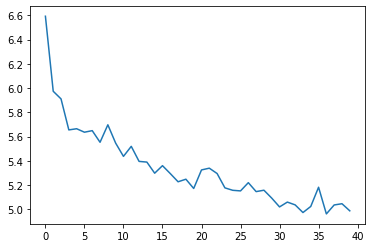

Start predicting next line..
prediction input:  But if it's treasures 
 You're seeking 

prediction tensor:  tensor([[6092, 6092, 9895, 9754, 6092, 9895, 6413, 6092]])
i
full word
input len to lstm generation:  9
prediction tensor:  tensor([[6092, 6092, 9895, 9754, 6092, 9895, 6413, 6092, 9852]])
know
full word
input len to lstm generation:  10
prediction tensor:  tensor([[6092, 6092, 9895, 9754, 6092, 9895, 6413, 6092, 9852, 6092]])
i
full word
input len to lstm generation:  11
prediction tensor:  tensor([[6092, 6092, 9895, 9754, 6092, 9895, 6413, 6092, 9852, 6092, 9852]])
know
full word
input len to lstm generation:  12
prediction tensor:  tensor([[6092, 6092, 9895, 9754, 6092, 9895, 6413, 6092, 9852, 6092, 9852, 9754]])


(' i know i know \n', "I'm the one who")


In [11]:
model = WordSequence(spec_dict, ds)
model, loss_list = train(model, ds, spec_dict, num_lines=2)
torch.save(model.state_dict(), 'model3.pt')
plt.plot(loss_list)
plt.show()
pred_lines = predict(model, ds)
print(pred_lines)

In [ ]:
spec_dict = {"dropout": 0.7,
                 "num_lstm_layers": 2,
                 "bilstm_flag": True,
                 "word_bilstm_flag": False,
                 "use_artist": True,
                 "char_hidden_dim": 128,
                 "char_emb_dim": 100,
                 "char_model_type": "LSTM",
                 "word_emb_dim": 256,
                 "pre_train_word_embedding": None,
                 "feature_emb_dim": 128,
                 "final_hidden_dim": 512,
                 "learning rate": 0.001,
                 "iterations": 1000,
                 "print_every": 100,
                 "plot_every": 50
                 }
model, loss_list = train(model, ds, spec_dict, num_lines=2)
torch.save(model.state_dict(), 'model4.pt')

loss in current iteration:  4.775262355804443
Input string:  Superman can fly high way up in the sky 
 'Cause we believe he can 
 So what we choose to believe can always work out fine 
 It's all in the mind 
 So think of a place and imagine a time 
 And let's go be lovers 
 Believing me , Ooo Wee baby 
 Is believing right - oh yeah , and 
 I wanna love , wanna have , wanna hold you girl 
 So make me a believer 
 Wanna love you girl 
 Ooo so near 
 And forever keep you here 
 Forget all about whatever we fear 
 And let's just be lovers 
 Loving and loving , oh love is the way 
 To make me stay 
 I know the way to persuade me over to your side 
 And I am sure you can 
 So if you get me to believe 
 It all will work out fine 
 'Cause you'll blow my mind 
 So let's pick a place , a day , and a time 
 And then we'll be lovers 
 Loving and loving , oh love is the way 
 To make me
Target string:  can fly high way up in the sky 
 'Cause we believe he can 
 So what we choose to believe can alwa

loss in current iteration:  5.075776100158691
Input string:  the world is gon' turn . the world is on & on 
 the world is gon' turn . turn 
 and the world is on & on 
 all yeah oh yeah . yeah 
 on . on . on . on . on . on and on . on . on and on . on . on . on and on 
 on . on . on and on . the world is gon' turn . the world is on and on
Target string:  world is gon' turn . the world is on & on 
 the world is gon' turn . turn 
 and the world is on & on 
 all yeah oh yeah . yeah 
 on . on . on . on . on . on and on . on . on and on . on . on . on and on 
 on . on . on and on . the world is gon' turn . the world is on and on .
prediced tensor:  tensor([[ 1277, 10503,  9895,  5718,  9754,  9754,  2520,  9754,  9895,  9895,
          9754,  9895,  6092,  8851, 10503,  9895,  5718,  9754,  9754,  9754,
          6092,  6092,  2520,  9754,  9895,  9895,  9754,  9895,  6092,  9895,
          9754,  9754,  9754,  9754,  9754,  6092,  9895,  9754,  9754,  9754,
          9754,  9754,  9754,  97

In [12]:
saved_model = model

In [129]:
inp, target, artist, genre, next_line = ds.random_lyric_chunks(path = "data/csv/train.csv", subset=["R&B"], num_lines=4, if_train=False)

In [24]:
inp, target, artist, genre, next_line = ds.random_lyric_chunks(path = "data/csv/train.csv", subset=["R&B"], num_lines=2, if_train=False)
# inp = "Are you ready ? "
# target = inp
input_list = gen_input(ds, inp, target, artist, genre, if_train=False)
res = batchify_sequence_labeling(input_list, False)
(word_seq_tensor, feature_seq_tensors, word_seq_lengths, word_seq_recover, char_seq_tensor, char_seq_lengths,
     char_seq_recover, ph_inputs, ph_seq_lengths, ph_seq_recover, target_seq_tensor, mask) = res
batch_size = word_seq_tensor.size(0)
seq_len = word_seq_tensor.size(1)
genre_input = feature_seq_tensors[1]
artist_input = feature_seq_tensors[0]
outs = model(word_seq_tensor, genre_input, artist_input, word_seq_lengths, char_seq_tensor, char_seq_lengths, char_seq_recover,
        ph_inputs, ph_seq_lengths, ph_seq_recover)
outs = outs.view(batch_size * seq_len, -1)
score = F.log_softmax(outs, 1)
_, pred = torch.max(score, 1)
pred = pred.view(batch_size, seq_len)
print("input: ", inp)
print("next_line: ", next_line)
print("predicted lyrics: ")
print(decode_lyrics(ds, pred[0]))

input:  No matter what we go through 

next_line:  We are conquerors
predicted lyrics: 

 
 you know 
 
 i 


In [108]:
score.size()

torch.Size([4, 10689])

In [115]:
score = F.log_softmax(o1,1)
_, pred = torch.max(score, 1)

In [116]:
pred

tensor([10578])

In [100]:
loss_function = nn.NLLLoss(ignore_index=0)

In [101]:
pred

tensor([10578, 10578, 10578, 10578])

In [89]:
target_seq_tensor.view(4)[-1].view(1).size()

torch.Size([1])

In [114]:
target_seq_tensor

tensor([[5748, 6473, 7967,  788]])

In [113]:
loss_function(score, target_seq_tensor.view(4)[-1].view(1))

tensor(4.7541, grad_fn=<NllLossBackward>)

In [63]:
target_seq_tensor.view(4)[-1]

tensor(788)

In [60]:
decode_lyrics(ds, target_seq_tensor.view(4))

'are you ready ? '

In [53]:
ds.all_characters.index('\n')

96

In [46]:
_, idx = torch.max(score, 1)

In [48]:
max(score[0])

tensor(-2.3579, grad_fn=<UnbindBackward>)

In [50]:
score[0][score[0] > -2.4]

tensor([-2.3579], grad_fn=<IndexBackward>)

In [47]:
idx

tensor([10578, 10578, 10578, 10578])

In [45]:
decode_lyrics(ds, idx)

'scented unbeatable scented motivating '

In [34]:
decode_lyrics(ds, pred[0])

'\n \n \n \n '

In [9]:
pred_lines = predict(model, ds)
print(pred_lines)

Start predicting next line..
prediction input:  Our love is like water/angels 
 Pinned down and abused 

prediction tensor:  tensor([[5064, 7653, 2464, 7563, 5617, 3331, 3863, 9343, 4211, 5617, 2971]])
oh
full word
input len to lstm generation:  12
prediction tensor:  tensor([[5064, 7653, 2464, 7563, 5617, 8930, 3863, 9343, 7563, 5617, 2971, 1330]])
yeah
full word
input len to lstm generation:  13
prediction tensor:  tensor([[5064, 7653, 2464, 7563, 5617, 8930, 3863, 9343, 7563, 5617, 2971, 1330,
         9474]])
me
full word
input len to lstm generation:  14
prediction tensor:  tensor([[ 5064,  7653,  2464,  7563,  5617,  8930,  3863,  9343,  7563,  5617,
          2971, 10420,  9474,  7643]])
)
full word
input len to lstm generation:  15
prediction tensor:  tensor([[ 5064,  7653,  2464,  7563,  5617,  8930,  3863,  9343,  7563,  5617,
          2971, 10420,  9474,  7643,  9616]])
.
full word
input len to lstm generation:  16
prediction tensor:  tensor([[ 5064,  7653,  2464,  7563,  5

In [19]:
(word_seq_tensor, feature_seq_tensors, word_seq_lengths, word_seq_recover, char_seq_tensor, char_seq_lengths, char_seq_recover, phone_seq_tensor, phone_seq_lengths, phone_seq_recover, target_seq_tensor, mask) = res

In [20]:
lr = 0.001
model = WordSequence(spec_dict, ds)
optimizer = optim.Adam(model.parameters(), lr=lr)

build char sequence feature extractor: LSTM ...
build char sequence feature extractor: LSTM ...


In [12]:
word_seq_tensor

tensor([[7676, 2313, 3358, 2017, 8924, 7537, 7537, 7676, 2313, 3358, 2017, 8924,
         7537]])

In [13]:
char_seq_tensor.size()

torch.Size([13, 6])

In [21]:
model(word_seq_tensor, feature_seq_tensors[0], feature_seq_tensors[1], word_seq_lengths, char_seq_tensor, char_seq_lengths, char_seq_recover, phone_seq_tensor, phone_seq_lengths, phone_seq_recover)


IndexError: index out of range in self

In [30]:
s = "Said I'm sorry baby ,  said forgive me baby\nNow you ain't never seen me on one"
tokens = re.split("[ ]+", s)

In [31]:
tokens

['Said',
 "I'm",
 'sorry',
 'baby',
 ',',
 'said',
 'forgive',
 'me',
 'baby\nNow',
 'you',
 "ain't",
 'never',
 'seen',
 'me',
 'on',
 'one']